# PROBLEM STATEMENT

You have been hired as a consultant to a start-up that is running a targetted marketing ads on facebook. The company wants to anaylze customer behaviour by predicting which customer clicks on the advertisement. Customer data is as follows: 

Inputs: 
- Name 
- e-mail 
- Country 
- Time on Facebook 
- Estimated Salary (derived from other parameters)

Outputs:
- Click (1: customer clicked on Ad, 0: Customer did not click on the Ad)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [2]:
fb = pd.read_csv('Facebook_Ads_2.csv', encoding='ISO-8859-1')
fb.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [3]:
fb.drop(['Names', 'emails', 'Country'], axis = 1, inplace = True)
fb.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


In [4]:
fb.describe()

,Time Spent on Site,Salary,Clicked
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


# EDA

<Axes: >

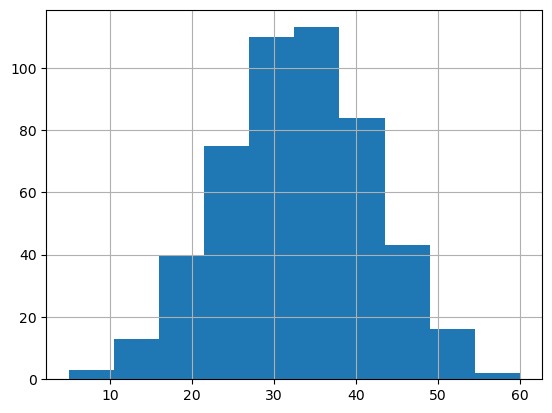

In [5]:
fb['Time Spent on Site'].hist()

<Axes: xlabel='Time Spent on Site', ylabel='Clicked'>

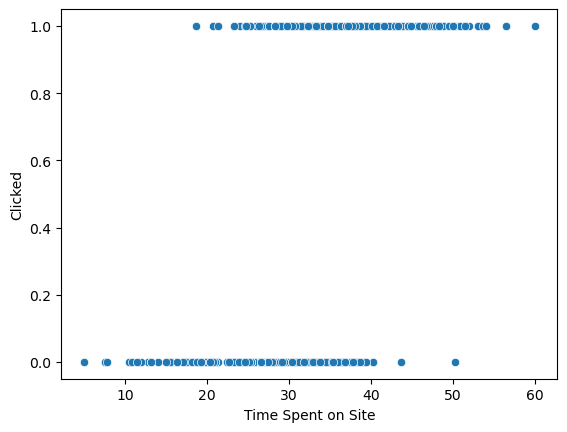

In [6]:
sns.scatterplot(x = 'Time Spent on Site', y = 'Clicked', data = fb)

<Axes: xlabel='Time Spent on Site', ylabel='Salary'>

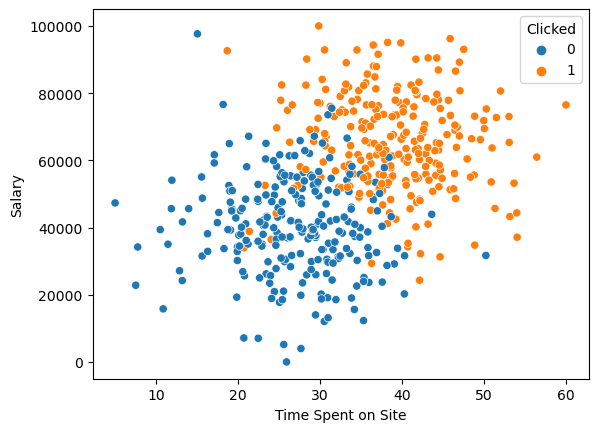

In [7]:
sns.scatterplot(x = 'Time Spent on Site', y = 'Salary', hue = 'Clicked', data = fb)

# Data Splitting

In [8]:
X = fb.drop('Clicked', axis = 1)
y = fb['Clicked']

In [9]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_scaled = pd.DataFrame(std.fit_transform(X), columns = X.columns)
X_test_scaled = pd.DataFrame(std.transform(X_test), columns = X.columns)

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

params = {
    'C':10 ** np.linspace(-3, 3),
    'penalty':['l1', 'l2'],
    'solver':['saga']
}

gridsearch = GridSearchCV(LogisticRegression(random_state = 0), params).fit(X_scaled, y)

gridsearch.best_params_

{'C': 0.029470517025518096, 'penalty': 'l1', 'solver': 'saga'}

In [12]:
lr = LogisticRegression(**gridsearch.best_params_, random_state = 0).fit(X_scaled, y)

<Axes: >

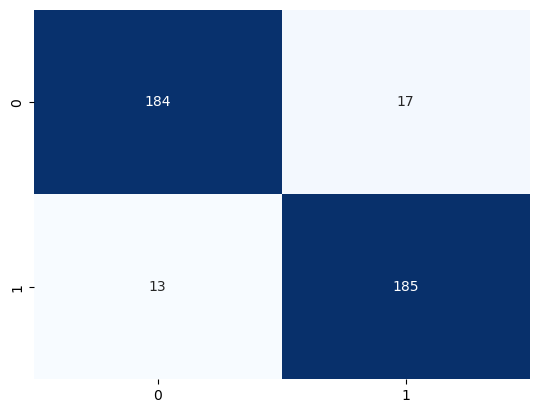

In [13]:
from sklearn.metrics import confusion_matrix as cm, accuracy_score as accuracy

hmap_lr = sns.heatmap(cm(y, lr.predict(X_scaled)), annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
hmap_lr

In [14]:
score_lr = accuracy(y, lr.predict(X_scaled))
score_lr

0.924812030075188

# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

params = {
    'n_neighbors':np.arange(5, 15)
}

gridsearch = GridSearchCV(KNeighborsClassifier(), params).fit(X_scaled, y)

gridsearch.best_params_

{'n_neighbors': 12}

In [16]:
knn = KNeighborsClassifier(**gridsearch.best_params_).fit(X_scaled, y)

<Axes: >

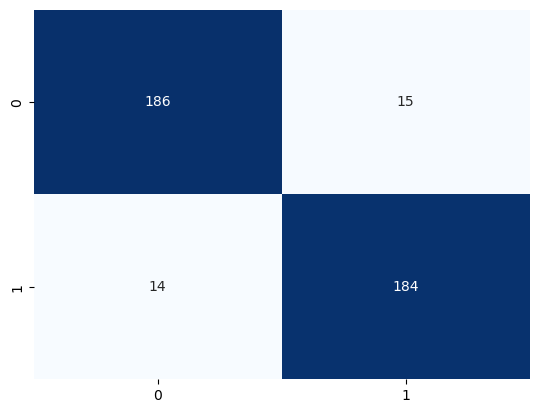

In [17]:
hmap_knn = sns.heatmap(cm(y, knn.predict(X_scaled)), annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
hmap_knn

In [18]:
score_knn = accuracy(y, knn.predict(X_scaled))
score_knn

0.9273182957393483

# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

params = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':np.arange(1, 10),
    'min_samples_leaf':np.arange(1, 10)
}

gridsearch = GridSearchCV(DecisionTreeClassifier(random_state = 0), params).fit(X_scaled, y)

gridsearch.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 7}

In [20]:
dt = DecisionTreeClassifier(**gridsearch.best_params_, random_state = 0).fit(X_scaled, y)

<Axes: >

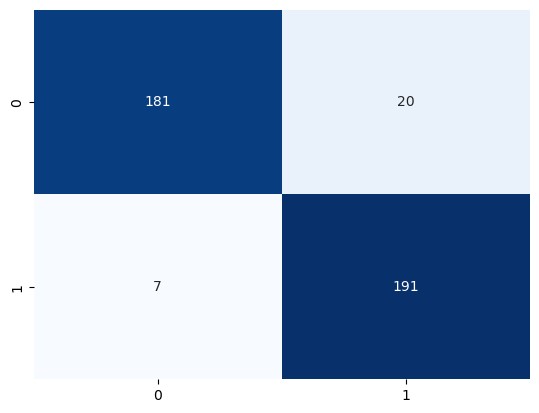

In [21]:
hmap_dt = sns.heatmap(cm(y, dt.predict(X_scaled)), annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
hmap_dt

In [22]:
score_dt = accuracy(y, dt.predict(X_scaled))
score_dt

0.9323308270676691

# Ensemble Voting Classifier

In [23]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(
    estimators = [
        ('lr', lr),
        ('knn', knn),
        ('dt', dt)
    ],
    voting = 'hard'
).fit(X_scaled, y)

<Axes: >

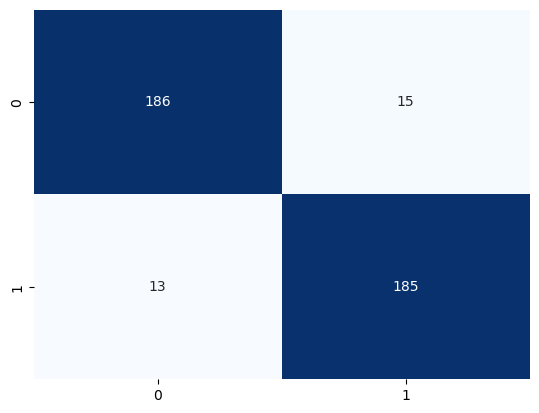

In [24]:
hmap_vc = sns.heatmap(cm(y, vc.predict(X_scaled)), annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
hmap_vc

In [25]:
score_vc = accuracy(y, vc.predict(X_scaled))
score_vc

0.9298245614035088

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_samples':[None, 0.9, 0.95],
    'max_depth':[2, 5, 8, 10],
    'min_samples_leaf':[2, 5, 8, 10]
}

gridsearch = GridSearchCV(RandomForestClassifier(random_state = 0, n_jobs = -1), params).fit(X_scaled, y)

gridsearch.best_params_

{'max_depth': 5, 'max_samples': 0.9, 'min_samples_leaf': 2}

In [27]:
rf = RandomForestClassifier(**gridsearch.best_params_, random_state = 0, n_jobs = -1).fit(X_scaled, y)

<Axes: >

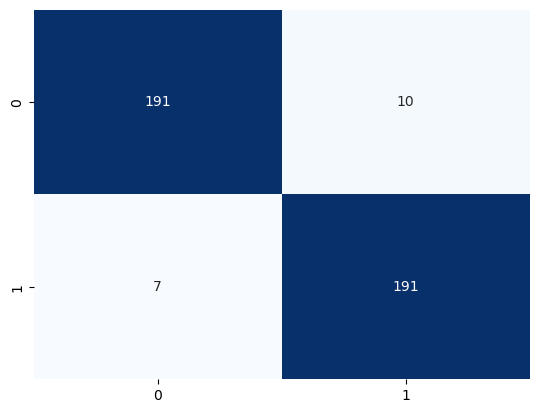

In [28]:
hmap_rf = sns.heatmap(cm(y, rf.predict(X_scaled)), annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
hmap_rf

In [29]:
score_rf = accuracy(y, rf.predict(X_scaled))
score_rf

0.9573934837092731

# MODEL TESTING

In [30]:
#Logistic Regression
score_lr = accuracy(y_test, lr.predict(X_test_scaled))
score_lr

0.87

In [31]:
#KNN
score_knn = accuracy(y_test, knn.predict(X_test_scaled))
score_knn

0.86

In [32]:
#Decision Tree
score_dt = accuracy(y_test, dt.predict(X_test_scaled))
score_dt

0.8

In [33]:
#Voting Classifier
score_vc = accuracy(y_test, vc.predict(X_test_scaled))
score_vc

0.85

In [34]:
#Random Forest
score_rf = accuracy(y_test, rf.predict(X_test_scaled))
score_rf

0.84

In [35]:
accuracy_df = pd.DataFrame([score_lr, score_knn, score_dt, score_vc, score_rf],
                           index = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Voting Classifier', 'Random Forest'],
                           columns = ['Accuracy']
                          ).sort_values(['Accuracy'], ascending = False)
accuracy_df

,Accuracy
Logistic Regression,0.87
K-Nearest Neighbors,0.86
Voting Classifier,0.85
Random Forest,0.84
Decision Tree,0.80


# Conclusion

Based on the analysis, Logistic Regression and K-Nearest Neighbors demonstrated superior performance compared to Decision Tree, Voting Classifier, and Random Forest in predicting customer clicks on Facebook ads.